<a href="https://colab.research.google.com/github/s-im-ran/Projects/blob/main/Bank_Churn_Prediction_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn Prediction**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bank Customer Churn Prediction.csv")


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['country','gender']
for column in columns:
  df[column+"encoded"]=le.fit_transform(df[column])

In [ ]:
df=df.drop(['country','gender'],axis=1)

In [ ]:
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,countryencoded,genderencoded
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,1


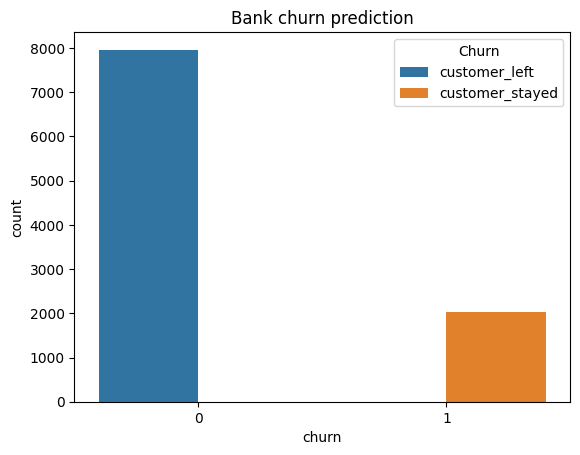

In [ ]:
sns.countplot(x=df['churn'],data=df,hue='churn')
plt.xlabel('churn')
plt.ylabel('count')
plt.title('Bank churn prediction')
plt.legend(title='Churn',labels=['customer_left','customer_stayed'])
plt.show()

In [ ]:
y=df['churn']
X=df.drop(['churn'],axis=1)
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
X_train.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,countryencoded,genderencoded
4901,15575935,673,59,0,178058.06,2,0,1,21063.71,0,1
4375,15616555,850,41,8,60880.68,1,1,0,31825.84,1,1
6698,15784491,725,31,6,0.00,1,0,0,61326.43,0,0
9805,15704597,644,33,7,174571.36,1,0,1,43943.09,0,1
1101,15782219,703,29,9,0.00,2,1,0,50679.48,2,1


In [ ]:
y_train.head()

4901    1
4375    0
6698    0
9805    0
1101    0
Name: churn, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8672
Confusion Matrix:
 [[1937   66]
 [ 266  231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [ ]:
pred=rfc.predict([x_test.iloc[87]])
true=y_test.iloc[87]
print(pred,true)
if(pred==true):
  print("correct prediction")
else:
  print("incorrect prediction")

[1] 1
correct prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
